## Credit Card Fraud Detection

#### Problem Statement

In contemporary banking, retaining high-value customers is a paramount goal, driving strategic operations. However, the looming threat of banking fraud poses a significant challenge across banks, impacting not just financial losses but also trust. The adoption of machine learning and deep learning for credit card fraud detection is a necessity now. These technologies empower banks to establish proactive monitoring and fortified fraud prevention mechanisms, reducing manual reviews, chargebacks, and transaction denials. Machine learning optimizes operations, mitigates resource burdens, and addresses financial strains, enhancing overall efficiency.

The primary objective of this project is to employ advanced machine learning models to detect fraudulent credit card transactions. Leveraging customer-level data acquired and analyzed through a collaborative effort between Worldline and the Machine Learning Group, the project seeks to address the critical challenge of credit card fraud. 

#### Dataset Description

The dataset encompasses credit card transactions executed by European cardholders during September 2013. This dataset encompasses a total of 284,807 transactions over a two-day timeframe, with 492 instances flagged as fraudulent, constituting a mere 0.172% of the total transactions.

Notably, the dataset exclusively comprises numerical input variables, meticulously generated through a PCA transformation. Unfortunately, the original features and supplementary contextual insights remain undisclosed due to confidentiality constraints. Specifically, the features denoted as V1 through V28 correspond to principal components resulting from PCA analysis. It's important to highlight that the attributes 'Time' and 'Amount' have not undergone the PCA transformation.

**Time** which represents the seconds elapsed between the current transaction and the first transaction in the dataset. <br>**Amount** which represents the total transaction value.

The response variable, **Class**, has two values:
<br>**1** for fraudulent cases
<br>**0** for non-fraudulent cases

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE, ADASYN

# To ignore warnings
warnings.filterwarnings("ignore")

# Set plotting to display inline
%matplotlib inline

In [67]:
# Load the data
df = pd.read_csv(r"C:\Users\abin\Downloads\archive\creditcard.csv")

In [68]:
# Check the head of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
# Check the shape of the data
df.shape

(284807, 31)

In [70]:
# Get some more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [71]:
# descriptive statistics for the DataFrame
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Exploratory Data Analysis (EDA)**

In [72]:
# Checking the distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Credit Card Fraud Class')

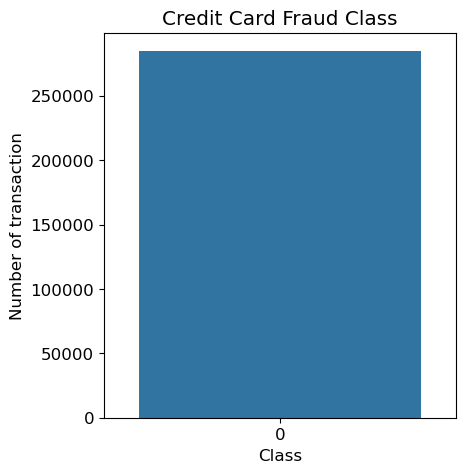

In [73]:
# Checking the class distribution of the target variable
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class")

<Axes: ylabel='Class'>

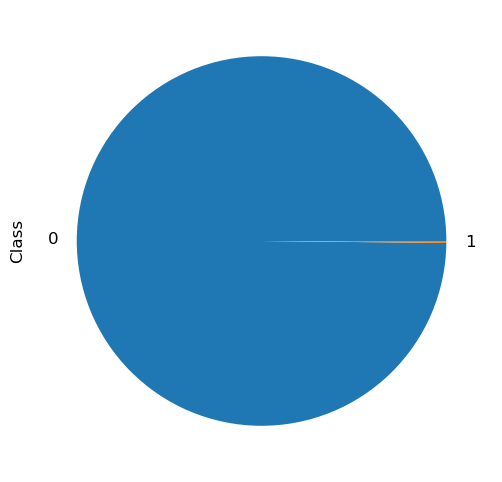

In [74]:
df['Class'].value_counts(normalize = True).plot.pie()

Among the total of 284,807 records in the dataset, only 492 instances are labeled as fraudulent transactions, indicating an extremely imbalanced class distribution.

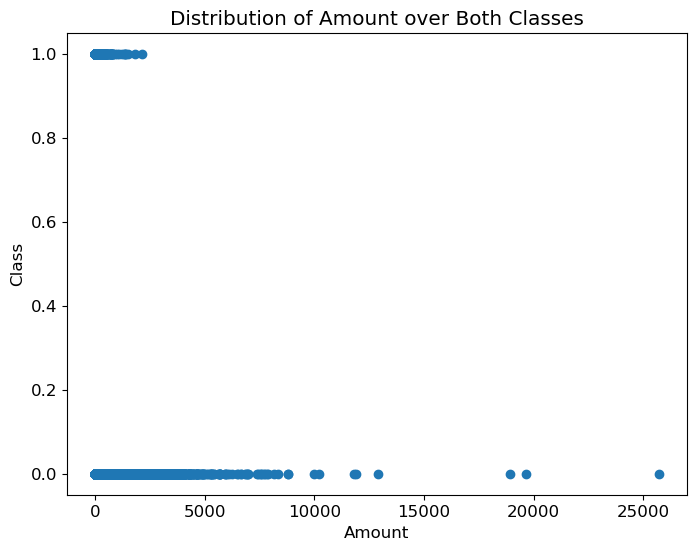

In [75]:
# Adjusting figuresize, and fontsize
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(df["Amount"],df["Class"])

Transactions with lower amounts appear to have a higher likelihood of being fraudulent compared to transactions with higher amounts.

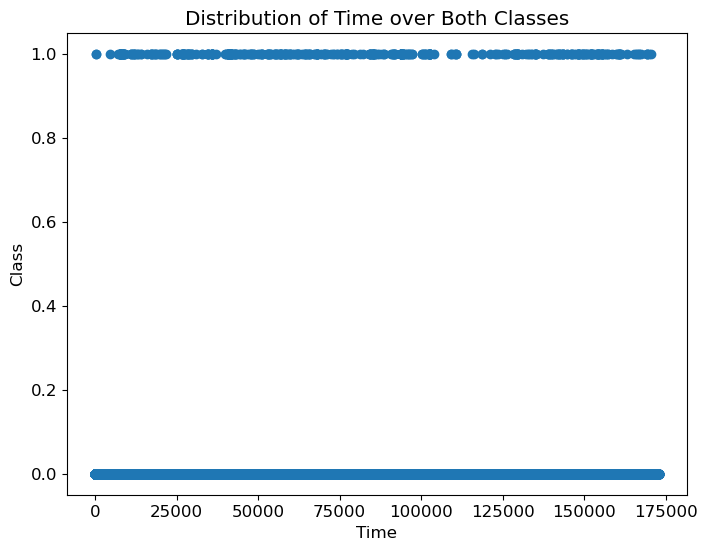

In [76]:
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(df["Time"],df["Class"])

The distribution of fraudulent transactions doesn't seem to exhibit significant insights based on the distribution over time. Both fraudulent and non-fraudulent transactions appear to be spread out across different time intervals.

In [77]:
# Checking for the missing value present in each columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing values in the dataset. 

**Outliers treatment**: Since the complete dataset has undergone PCA transformation, it can be reasonably inferred that the management of outliers might have been incorporated within this process. As a result, no supplementary actions regarding outlier treatment are currently being pursued for the dataframe.

<Axes: >

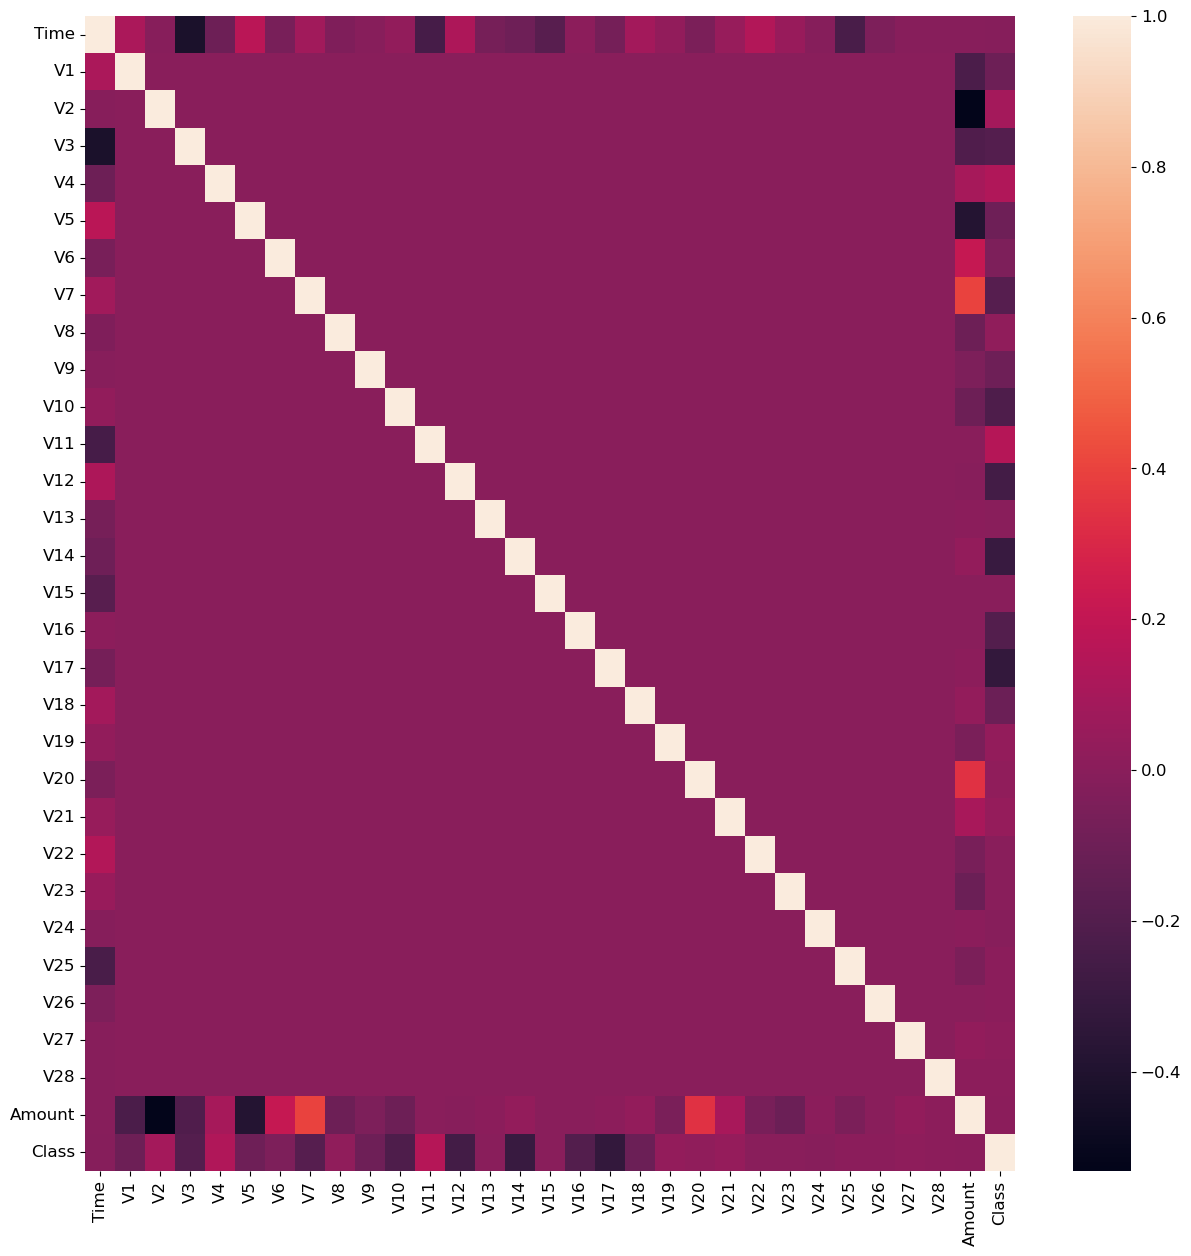

In [78]:
# correlation in heatmap
corr = df.corr()
fig = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, vmax= 1 )

From the correlation matrix, it is evident that there are no significant correlations observed among the features within the dataset.

**Transforming Time Information**

In [79]:
#Given that time information is provided in relative format, we're utilizing pandas' Timedelta, which represents the duration or difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

In [80]:
df['Time_Day'] = Delta_Time.dt.days.astype(int)
df['Time_Hour'] = Delta_Time.dt.components.hours.astype(int)
df['Time_Min'] = Delta_Time.dt.components.minutes.astype(int)

In [81]:
#We're dropping unnecessary columns to streamline the dataset. Since we've derived day, hour, and minute information from the Time column, we'll drop the original Time column.
df.drop('Time', axis=1, inplace=True)

In [82]:
#Considering the potential usefulness of the derived time information, we're retaining only the derived 'Time_Hour' column while dropping 'Time_Day' and 'Time_Min' columns.
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)

In [83]:
# Calculate the percentage distribution of normal vs. fraud transactions
classes = df['Class'].value_counts()
normal_percentage = (classes[0] / df['Class'].count()) * 100
fraud_percentage = (classes[1] / df['Class'].count()) * 100

print("Percentage of normal transactions:", normal_percentage)
print("Percentage of fraudulent transactions:", fraud_percentage)

Percentage of normal transactions: 99.82725143693798
Percentage of fraudulent transactions: 0.1727485630620034


**Splitting the data into train & test data**

In [84]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

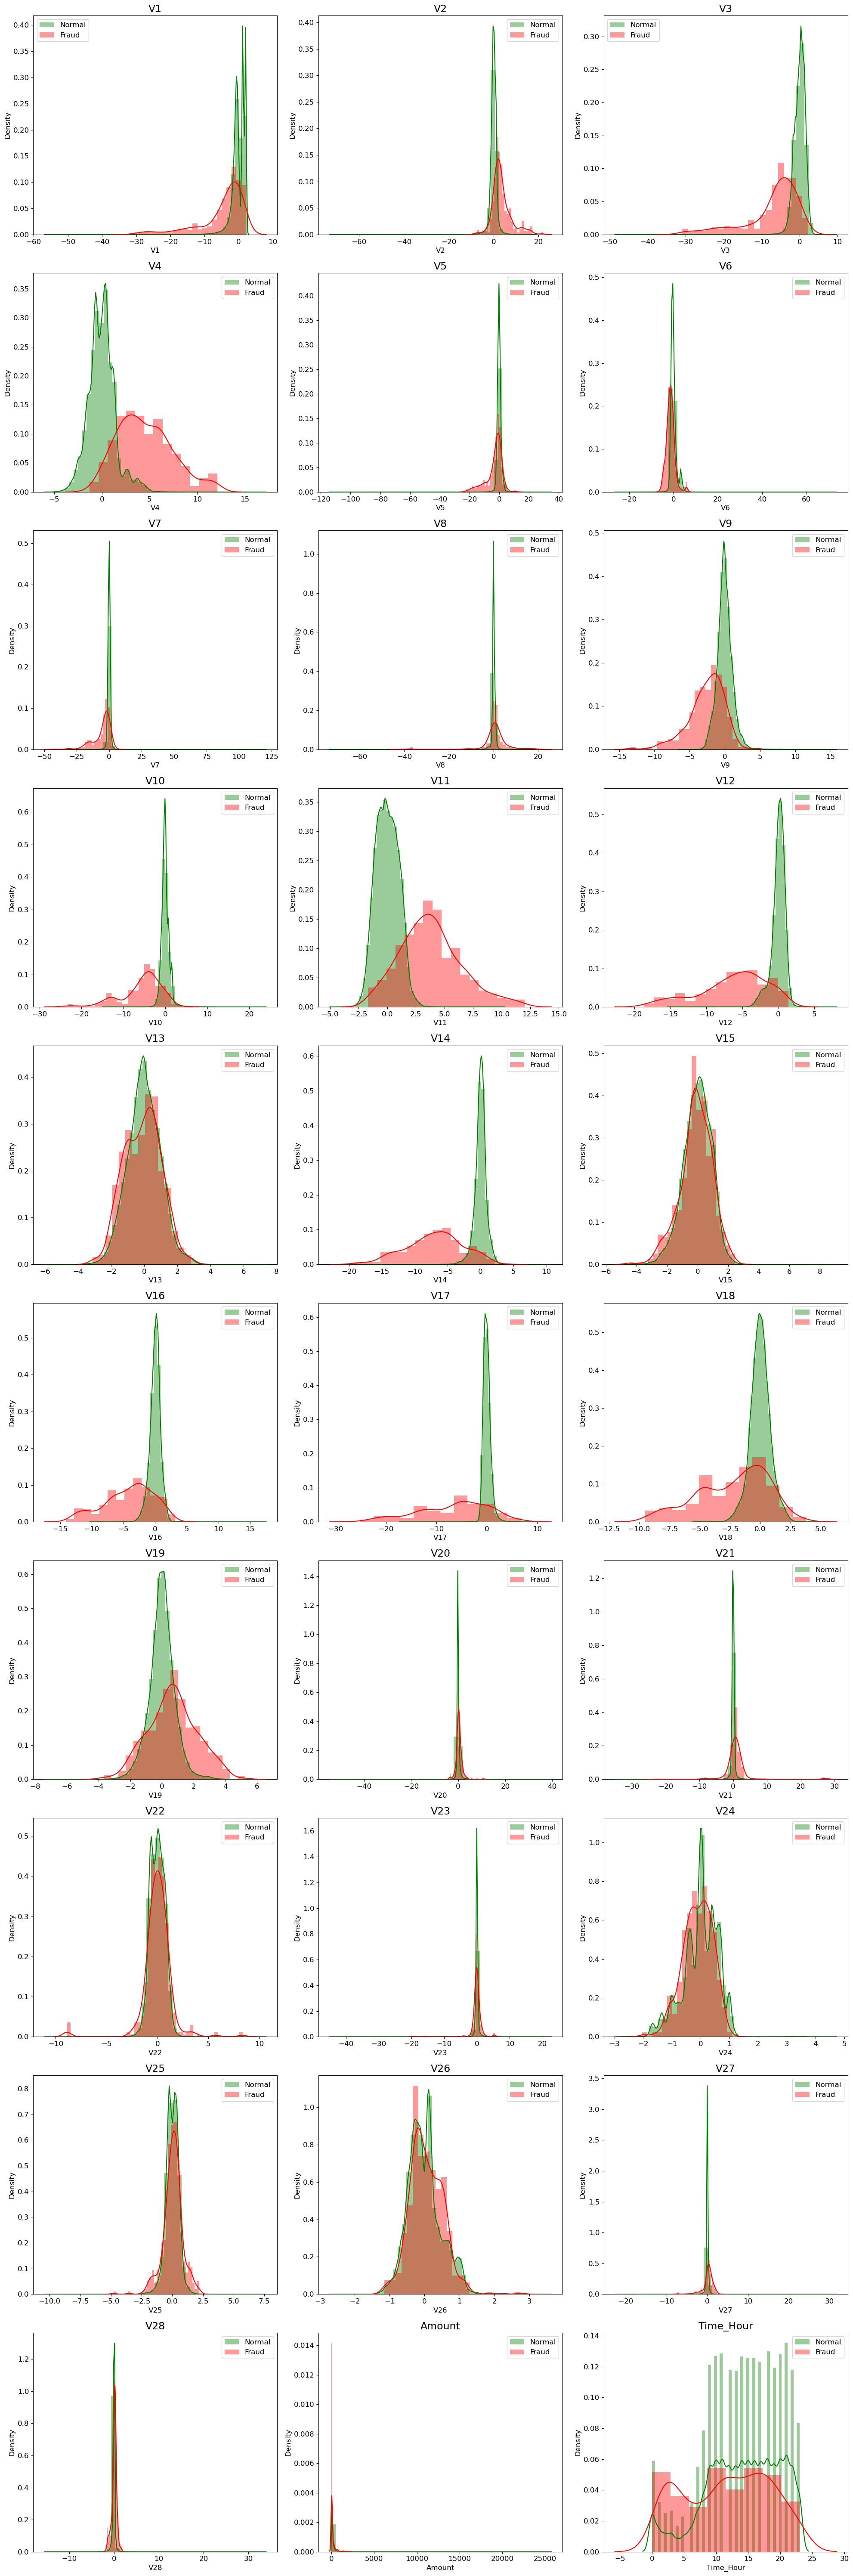

In [85]:
# Gathering all column names in a single variable
cols = list(X.columns.values)

# Plotting histograms to visualize the skewness of variables
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))

# Loop through each column and create a histogram subplot
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.distplot(X[col][normal_records], color='green', label='Normal')
    sns.distplot(X[col][fraud_records], color='red', label='Fraud')
    plt.title(col, fontsize=17)
    plt.legend()

plt.tight_layout()
plt.show()

We have observed notable skewness in several features. To determine this, we'll calculate the skewness using the **skew()** function. When the skewness exceeds the range of -1 to 1, it signals significant skewness. In response, we'll employ power transformation to rectify this skewness and approximate Gaussian distributions. 

In [86]:
skew_list = []
for i in cols:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(cols, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
Skewness,-3.294812,-4.507093,-2.310117,0.679326,-2.846625,1.975328,3.063943,-9.027251,0.558779,1.143322,...,3.358106,-0.196409,-4.843097,-0.55331,-0.395926,0.580156,-1.223133,12.653139,16.925914,-0.491133


In [87]:
# Filtering the features which have skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] < -1)].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount'],
      dtype='object', name='Features')


The Power Transformer from the **preprocessing** module in the sklearn library is utilized to transform the data distribution into a more Gaussian-like distribution.

In [88]:
# Create a PowerTransformer instance
pt = PowerTransformer(copy=False)

# Fitting and transforming the skewed features in the training data
X_train[skewed] = pt.fit_transform(X_train[skewed])

# Transforming the skewed features in the test data
X_test[skewed] = pt.transform(X_test[skewed])

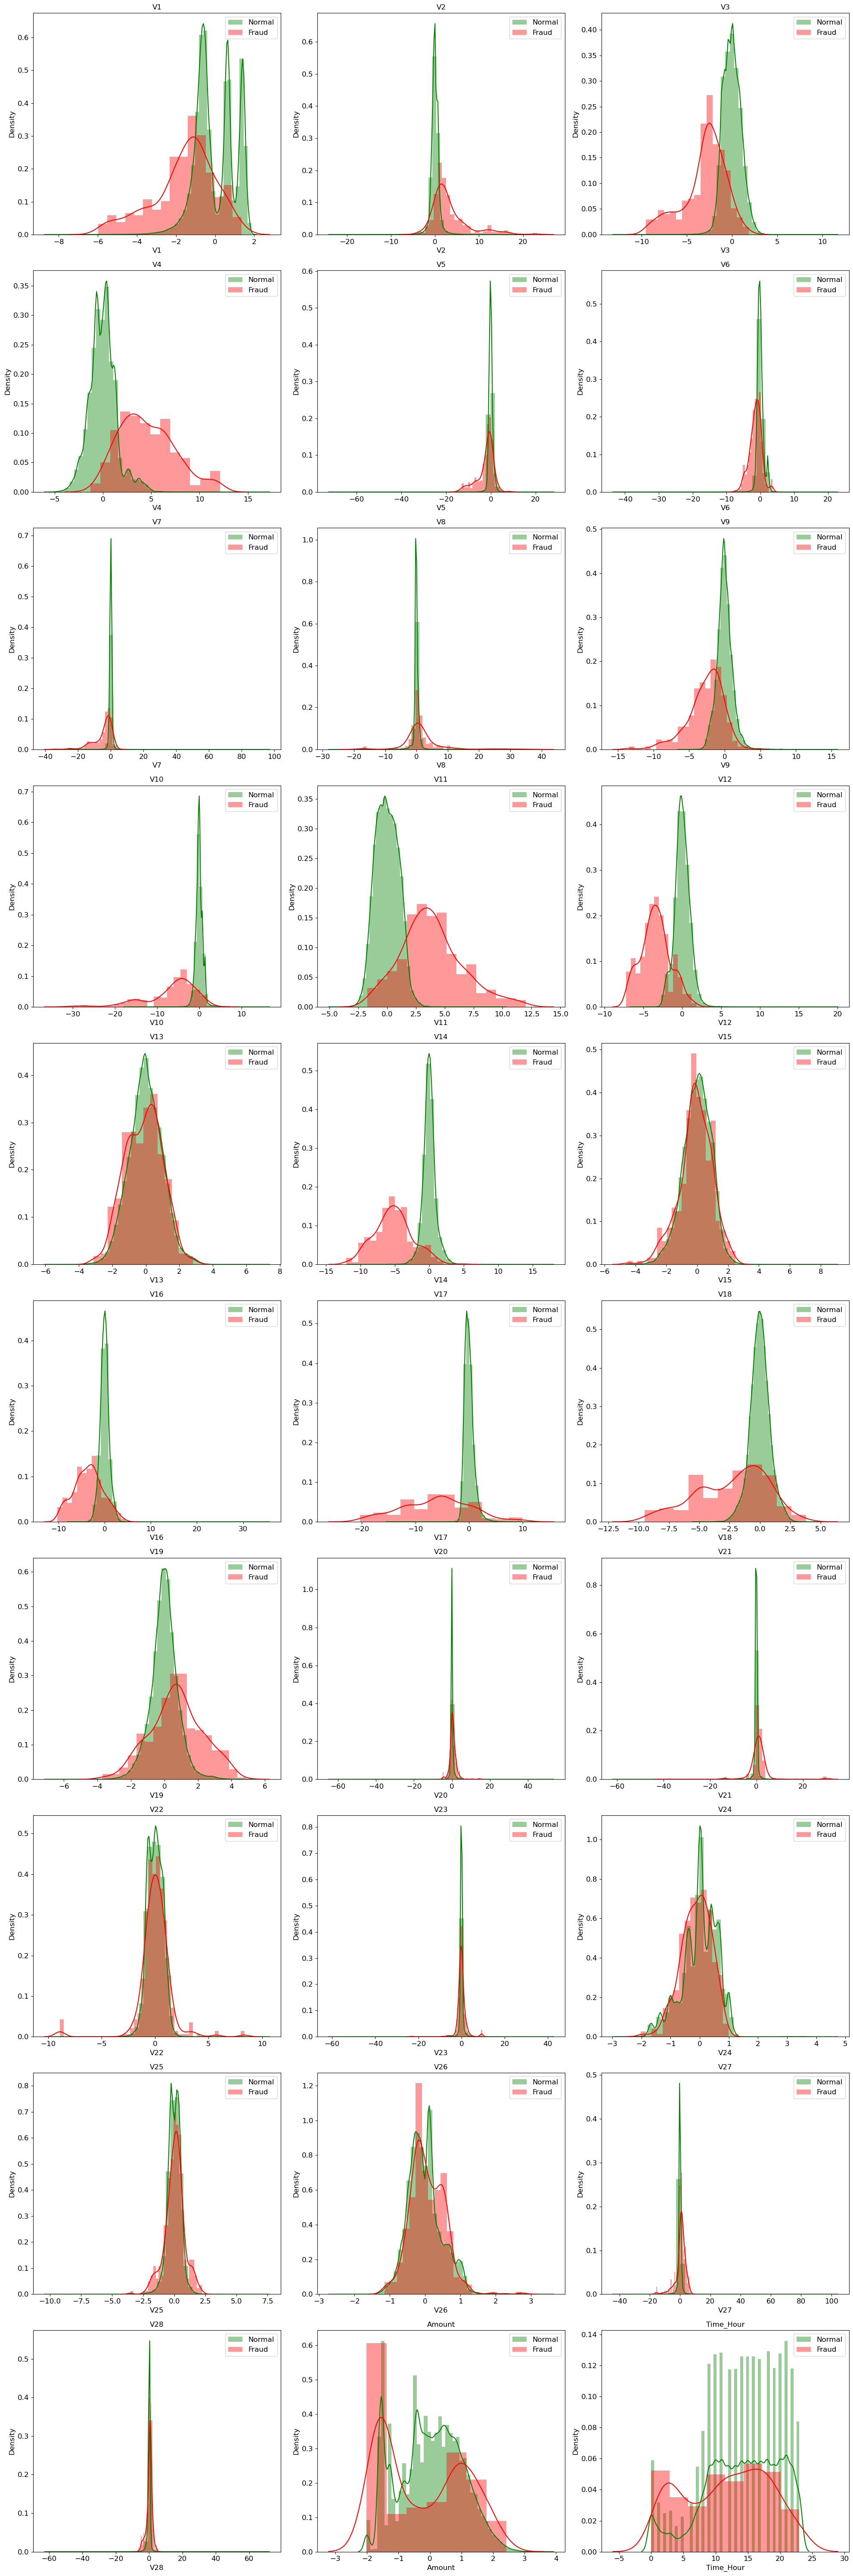

In [89]:
cols = list(X.columns.values)

plt.figure(figsize=(20, 60))

for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.distplot(X_train[col][normal_records], color='green', label='Normal')
    sns.distplot(X_train[col][fraud_records], color='red', label='Fraud')
    plt.title(col, fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

### Model Building

Constructing models using a range of algorithms, including:

- Logistic Regression
- k-nearest neighbors (knn)
- Random Forest
- XGBoost

#### Evaluation metrics

**Accuracy**:
  A frequently used metric, accuracy gauges how many correct predictions a model makes out of all predictions. It's calculated by comparing true positives (TP) and true negatives (TN) to the total predictions. However, accuracy can mislead with skewed classes or uneven error costs.<br><br>

**ROC-AUC Score**:
  The ROC curve and Area Under the Curve (AUC) are standard for binary classification models. The ROC curve plots sensitivity against 1-specificity for different thresholds, while AUC condenses overall performance into a value between 0 and 1. Higher AUC indicates better performance.<br><br>

**Confusion Matrix**:
  A table summarizing a model's performance, the confusion matrix presents actual and predicted classifications. It contains true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN), which enable computation of accuracy, precision, recall, F1-score, and more.<br><br>

* **True Positive**: The classification model correctly predicts the output to be positive.<br>
* **True Negative**: The classification model correctly predicts the output to be negative.<br>
* **False Positive**: The classification model incorrectly predicts the output to be positive.<br>
* **False Negative**: The classification model incorrectly predicts the output to be negative.








#### Model Building on Imbalanced Data

**Logistic Regression**

Logistic regression models the relationship between the dependent variable and independent variables using a logistic function, often referred to as the sigmoid function. This function outputs a probability value ranging between 0 and 1, which is useful for binary classification tasks.

- **L1 Regularization (Lasso)**

L1 regularization, also known as Lasso regularization, is a technique applied to logistic regression (and other models) to prevent overfitting and improve model generalization. It achieves this by adding a penalty term to the loss function that equals the absolute value of the coefficients multiplied by a constant (lambda).

- **L2 Regularization (Ridge)**

L2 regularization, known as Ridge regularization, is another technique used with logistic regression to control overfitting. It adds a penalty term to the loss function equal to the square of the coefficients multiplied by a constant (lambda).

**K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is a simple yet effective machine learning algorithm used for classification and regression tasks. KNN operates on the principle of similarity, where it assigns a label or predicts a value for a data point based on its proximity to other data points. The number of nearest neighbors (k) and the distance metric used can be specified as parameters during model training.

**Random Forest**

Random Forest is an ensemble algorithm that combines multiple decision trees to improve prediction accuracy and control overfitting. It aggregates the outputs of individual trees to make robust predictions for classification and regression tasks. The idea behind this method is to train multiple trees on random subsets of the data, and average their predictions to produce a more robust result.

**XGBoost**

XGBoost is an advanced boosting algorithm that enhances decision tree models. It optimizes prediction accuracy through gradient boosting, handling overfitting and supporting both classification and regression tasks effectively. XGBoost Classifier trains weak decision trees in a sequential manner, using the errors from the previous tree to improve the predictions of the next tree. This process continues until a set number of trees have been trained, or a specified stopping criterion is met.

Logistic Regression (L1) accuracy: 0.999
Logistic Regression (L1) ROC AUC score: 0.782
Confusion Matrix for Logistic Regression (L1):
[[56866     9]
 [   38    49]]
Classification Report for Logistic Regression (L1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.84      0.56      0.68        87

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Optimal Threshold for Logistic Regression (L1): 0.003183


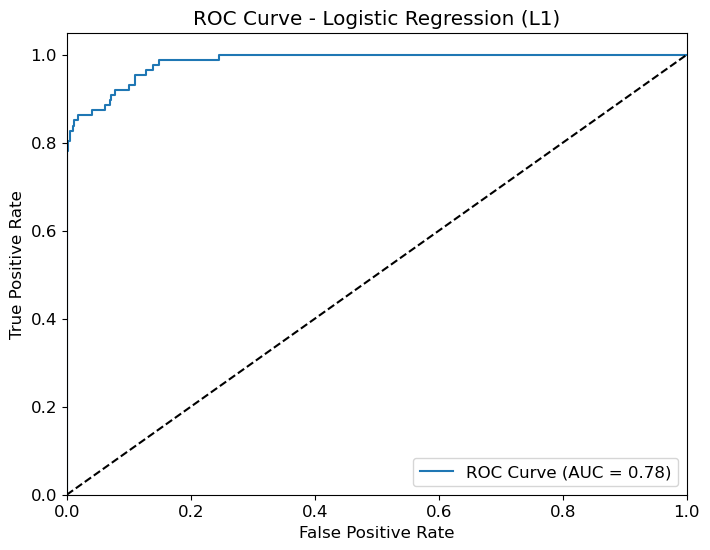

Logistic Regression (L2) accuracy: 0.999
Logistic Regression (L2) ROC AUC score: 0.787
Confusion Matrix for Logistic Regression (L2):
[[56866     9]
 [   37    50]]
Classification Report for Logistic Regression (L2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.85      0.57      0.68        87

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Optimal Threshold for Logistic Regression (L2): 0.003092


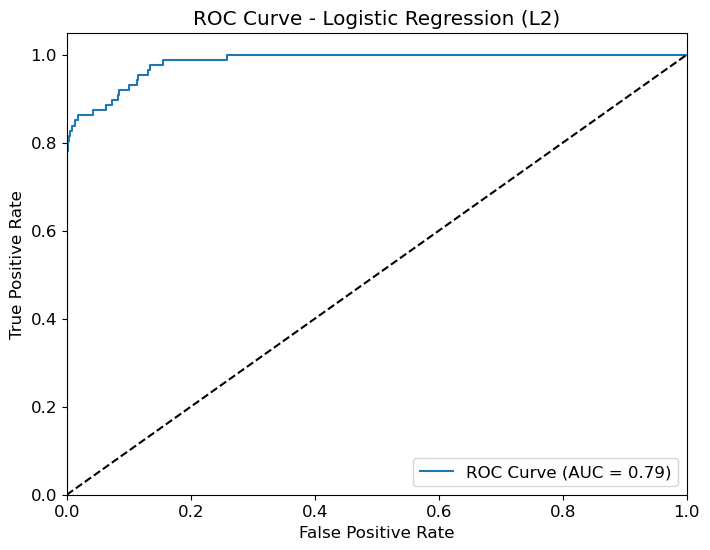

K-Neighbors Classifier accuracy: 0.999
K-Neighbors Classifier ROC AUC score: 0.845
Confusion Matrix for K-Neighbors Classifier:
[[56867     8]
 [   27    60]]
Classification Report for K-Neighbors Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.88      0.69      0.77        87

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Optimal Threshold for K-Neighbors Classifier: 0.200000


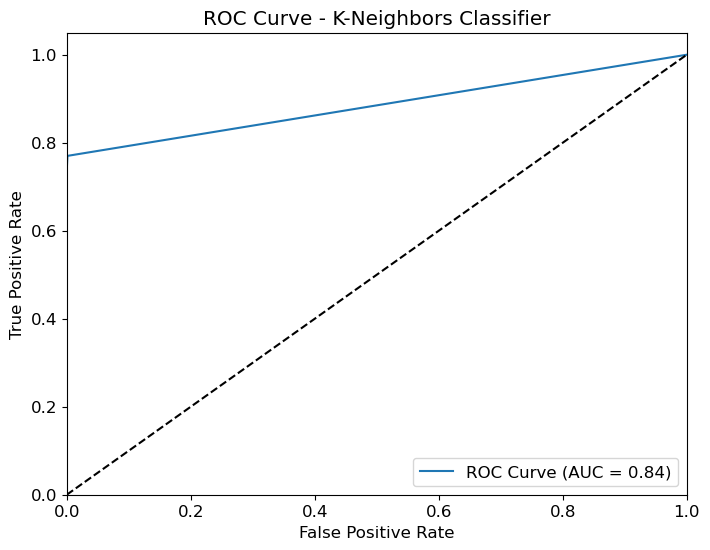

Random Forest accuracy: 1.000
Random Forest ROC AUC score: 0.879
Confusion Matrix for Random Forest:
[[56869     6]
 [   21    66]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.92      0.76      0.83        87

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Optimal Threshold for Random Forest: 0.010000


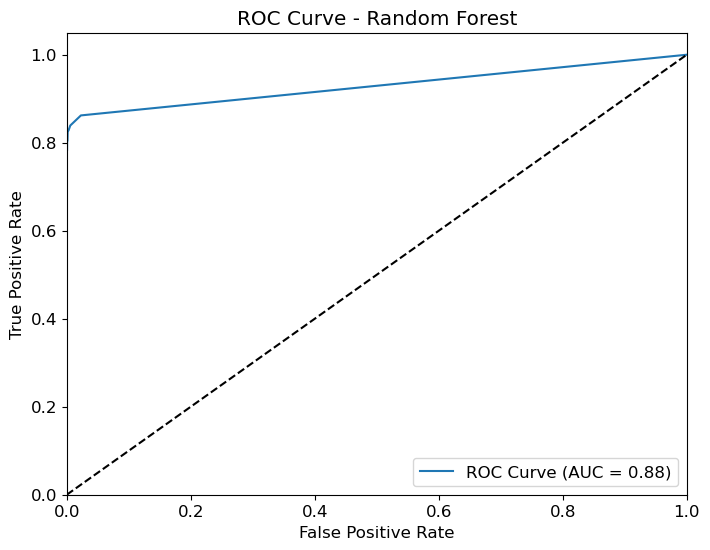

XGBClassifier accuracy: 1.000
XGBClassifier ROC AUC score: 0.891
Confusion Matrix for XGBClassifier:
[[56871     4]
 [   19    68]]
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.94      0.78      0.86        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Optimal Threshold for XGBClassifier: 0.000099


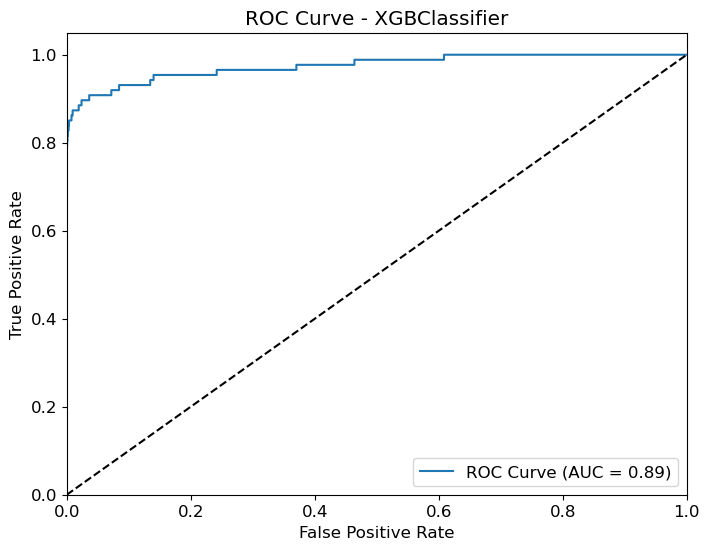

In [90]:
models = [
    ('Logistic Regression (L1)', LogisticRegression(penalty='l1', solver='liblinear')),
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2')),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier()),
]

for name, model in models:
    # Train model
    model.fit(X_train, y_train)

    # Test model
    y_pred = model.predict(X_test)
    
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.3f}')
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{name} ROC AUC score: {roc_auc:.3f}')

    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix(y_test, y_pred))

    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Find threshold that maximizes true positive rate while controlling false positive rate
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    print(f'Optimal Threshold for {name}: {optimal_threshold:.6f}')
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

**Insights**

Based on the accuracy and ROC AUC scores, both the **Random Forest** and **XGBClassifier** models seem to perform well, as they achieve perfect accuracy and higher ROC AUC scores compared to the other models.

#### Model Building on Imbalanced Data Using StratifiedKFold Cross Validation

**Cross Validation**

Cross validation is a technique used in machine learning to evaluate the performance of machine learning models. It involves dividing the available data into multiple subsets, using one of these subsets as a validation set, and training the model on the remaining subsets. This process is repeated multiple times, each time using a different subset as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.

**StratifiedKFold Cross Validation**

StratifiedKFold is a specialized form of cross-validation that maintains the original class distribution within each fold, ensuring that the relative proportions of different classes are preserved. This technique is particularly beneficial for datasets with imbalanced class distributions, as it prevents one class from being underrepresented in any specific fold. StratifiedKFold enhances the reliability of model performance evaluation by producing more representative validation sets and mitigating the risk of biased results due to class imbalance.

In [92]:
models = [
    ('Logistic Regression (L1)', LogisticRegression(penalty='l1', solver='liblinear')),
    ('Logistic Regression (L2)', LogisticRegression(penalty='l2')),
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier()),
]

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for name, model in models:
    print(f"*** Model: {name} ***")
    
    auc_scores = []
    acc_scores = []
    optimal_thresholds = []

    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

        model.fit(X_train_fold, y_train_fold)
        
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]
        
        acc_fold = accuracy_score(y_test_fold, y_pred_fold)
        acc_scores.append(acc_fold)
        
        auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        auc_scores.append(auc_fold)
        
        # Calculate ROC curve
        fpr, tpr, fold_thresholds = roc_curve(y_test_fold, y_prob_fold)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = fold_thresholds[optimal_idx]
        optimal_thresholds.append(optimal_threshold)
    
    avg_acc = np.mean(acc_scores)
    avg_auc = np.mean(auc_scores)
    avg_optimal_threshold = np.mean(optimal_thresholds)
    
    print(f'Average Accuracy: {avg_acc:.3f}')
    print(f'Average ROC AUC score: {avg_auc:.3f}')
    print(f'Average Optimal Threshold: {avg_optimal_threshold:.6f}\n')

*** Model: Logistic Regression (L1) ***
Average Accuracy: 0.999
Average ROC AUC score: 0.973
Average Optimal Threshold: 0.003437

*** Model: Logistic Regression (L2) ***
Average Accuracy: 0.999
Average ROC AUC score: 0.973
Average Optimal Threshold: 0.003317

*** Model: K-Neighbors Classifier ***
Average Accuracy: 0.999
Average ROC AUC score: 0.926
Average Optimal Threshold: 0.200000

*** Model: Random Forest ***
Average Accuracy: 1.000
Average ROC AUC score: 0.946
Average Optimal Threshold: 0.022000

*** Model: XGBClassifier ***
Average Accuracy: 1.000
Average ROC AUC score: 0.978
Average Optimal Threshold: 0.003722



**Insights**

Based on the accuracy and ROC AUC scores, **XGBClassifier** model perform well with an ROC AUC score of .946

**Conclusion - On Imbalanced Data**

Based on the model building on imbalanced data, **XGBClassifier with StratifiedKFold Cross Validation** gives better accuracy and roc auc scorce as compare to other models

#### Model Building on Balanced Data

**Class Balancing:**

- Random Oversampling
- SMOTE (Synthetic Minority Over-sampling Technique)
- ADASYN (Adaptive Synthetic Sampling)


**RandomOverSampling with StratifiedKFold Cross Validation**

**Random Oversampling**

Random Oversampling is a technique used to address class imbalance in a dataset by increasing the number of instances in the minority class. This involves randomly duplicating examples from the minority class to balance its representation with the majority class. While this method helps prevent the model from ignoring the minority class, it can lead to overfitting.

In [93]:
for name, model in models:
    print(f"*** Model: {name} ***")
        
    auc_scores = []
    acc_scores = []
    optimal_thresholds = []

    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        # Initialize RandomOverSampler
        sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        
        # Resample the training data
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_resampled, y_train_resampled)
        
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]
        
        acc_fold = accuracy_score(y_test_fold, y_pred_fold)
        acc_scores.append(acc_fold)
        
        auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        auc_scores.append(auc_fold)
        
        # Calculate ROC curve
        fpr, tpr, fold_thresholds = roc_curve(y_test_fold, y_prob_fold)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = fold_thresholds[optimal_idx]
        optimal_thresholds.append(optimal_threshold)
    
    avg_acc = np.mean(acc_scores)
    avg_auc = np.mean(auc_scores)
    avg_optimal_threshold = np.mean(optimal_thresholds)
    
    print(f'Average Accuracy: {avg_acc:.3f}')
    print(f'Average ROC AUC score: {avg_auc:.3f}')
    print(f'Average Optimal Threshold: {avg_optimal_threshold:.6f}\n')

*** Model: Logistic Regression (L1) ***
Average Accuracy: 0.977
Average ROC AUC score: 0.973
Average Optimal Threshold: 0.533255

*** Model: Logistic Regression (L2) ***
Average Accuracy: 0.977
Average ROC AUC score: 0.973
Average Optimal Threshold: 0.532096

*** Model: K-Neighbors Classifier ***
Average Accuracy: 0.999
Average ROC AUC score: 0.926
Average Optimal Threshold: 0.280000

*** Model: Random Forest ***
Average Accuracy: 1.000
Average ROC AUC score: 0.953
Average Optimal Threshold: 0.018000

*** Model: XGBClassifier ***
Average Accuracy: 1.000
Average ROC AUC score: 0.973
Average Optimal Threshold: 0.003247



**Insights**

It's evident that the **K-Neighbors Classifier** achieved the highest average ROC AUC score (0.926) and optimal threshold (0.28). However, both the **Random Forest** and **XGBClassifier** models achieved perfect accuracy and relatively high ROC AUC scores

**SMOTE Oversampling with StratifiedKFold Cross Validation**

**SMOTE**


SMOTE is a data augmentation technique used to address class imbalance in machine learning datasets, particularly in the context of the minority class. Unlike random oversampling which duplicates existing instances, SMOTE generates synthetic samples for the minority class. It does this by selecting an example from the minority class, finding its k nearest neighbors, and creating new synthetic samples along the line connecting the chosen example and its neighbors in the feature space.


In [ ]:
for name, model in models:
    print(f"*** Model: {name} ***")
    
    auc_scores = []
    acc_scores = []
    optimal_thresholds = []

    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        # Initialize SMOTE
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        
        # Resample the training data
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_resampled, y_train_resampled)
        
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]
        
        acc_fold = accuracy_score(y_test_fold, y_pred_fold)
        acc_scores.append(acc_fold)
        
        auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        auc_scores.append(auc_fold)
        
        # Calculate ROC curve
        fpr, tpr, fold_thresholds = roc_curve(y_test_fold, y_prob_fold)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = fold_thresholds[optimal_idx]
        optimal_thresholds.append(optimal_threshold)
    
    avg_acc = np.mean(acc_scores)
    avg_auc = np.mean(auc_scores)
    avg_optimal_threshold = np.mean(optimal_thresholds)
    
    print(f'Average Accuracy: {avg_acc:.3f}')
    print(f'Average ROC AUC score: {avg_auc:.3f}')
    print(f'Average Optimal Threshold: {avg_optimal_threshold:.6f}\n')

*** Model: Logistic Regression (L1) ***
Average Accuracy: 0.975
Average ROC AUC score: 0.971
Average Optimal Threshold: 0.546117

*** Model: Logistic Regression (L2) ***
Average Accuracy: 0.975
Average ROC AUC score: 0.971
Average Optimal Threshold: 0.547307

*** Model: K-Neighbors Classifier ***
Average Accuracy: 0.998
Average ROC AUC score: 0.933
Average Optimal Threshold: 0.440000

*** Model: Random Forest ***
Average Accuracy: 1.000
Average ROC AUC score: 0.972
Average Optimal Threshold: 0.058000

*** Model: XGBClassifier ***


**Oversampling with ADASYN Oversampling**

**ADASYN (Adaptive Synthetic Sampling)**

ADASYN is an oversampling technique designed to address class imbalance by generating synthetic examples for the minority class. It focuses on generating samples in regions of the feature space where the minority class is poorly represented. Unlike simple oversampling methods that create copies of existing examples, ADASYN synthesizes new instances by considering the density distribution of the feature space.

In [65]:
for name, model in models:
    print("\n*** Model:", name, "***\n")
    
    auc_scores = []
    acc_scores = []
    optimal_thresholds = []

    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        # Initialize ADASYN
        adasyn = ADASYN(sampling_strategy='auto', random_state=42)
        
        # Resample the training data
        X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_resampled, y_train_resampled)
        
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]
        
        acc_fold = accuracy_score(y_test_fold, y_pred_fold)
        acc_scores.append(acc_fold)
        
        auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        auc_scores.append(auc_fold)
        
        # Calculate ROC curve
        fpr, tpr, fold_thresholds = roc_curve(y_test_fold, y_prob_fold)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = fold_thresholds[optimal_idx]
        optimal_thresholds.append(optimal_threshold)
    
    avg_acc = np.mean(acc_scores)
    avg_auc = np.mean(auc_scores)
    avg_optimal_threshold = np.mean(optimal_thresholds)
    
    print(f'Average Accuracy: {avg_acc:.3f}')
    print(f'Average ROC AUC score: {avg_auc:.3f}')
    print(f'Average Optimal Threshold: {avg_optimal_threshold:.6f}\n')


*** Model: Logistic Regression (L1) ***

Average Accuracy: 0.915
Average ROC AUC score: 0.968
Average Optimal Threshold: 0.859953


*** Model: Logistic Regression (L2) ***

Average Accuracy: 0.915
Average ROC AUC score: 0.968
Average Optimal Threshold: 0.860234


*** Model: K-Neighbors Classifier ***

Average Accuracy: 0.998
Average ROC AUC score: 0.933
Average Optimal Threshold: 0.440000


*** Model: Random Forest ***



KeyboardInterrupt: 

### Conclusion

After analyzing various models with oversampling techniques, we observed that the XGBoost model with Random Oversampling using StratifiedKFold Cross-Validation yielded the highest accuracy and ROC values on the Balanced data. Subsequently, we conducted hyperparameter tuning and obtained impressive results, including a ROC value of 0.968 and a threshold of 0.002.

However, amidst all the models we explored, it was the Logistic Regression model with L2 Regularization and StratifiedKFold Cross-Validation, performed without any oversampling or undersampling, that delivered the best outcome in terms of performance with ROC value of 0.9877 and a threshold of 0.0018.